Import necessary libraries

In [3]:
import bisect

import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
from keras.models import load_model

Load data, drop columns that are not needed/wanted

In [4]:
#load data
df = pd.read_csv('/Users/nic/desktop/ML-Vapor-Pressures/models/model_data.csv')

df.drop(["Unnamed: 0"], axis=1, inplace = True)

#check for NA instances
print("# of na rows per column")
print(df.isna().sum())

#check for duplicates
print("# of duplicates")
print(df.duplicated().sum())
#df.drop_duplicates(inplace=True)
df

# of na rows per column
Temp(K)               0
RH                    0
N_H+(mol)             0
N_NH4+(mol)           0
N_Na+(mol)            0
N_SO42-(mol)          0
N_NO3-(mol)           0
N_Cl-(mol)            0
N_OH-(mol)            0
N_NH3-(mol)           0
Water Content(mol)    0
P_HNO3(atm)           0
P_HCL(atm)            0
P_NH3(atm)            0
P_H2SO4(atm)          0
P_HBr(atm)            0
contains_solid        0
dtype: int64
# of duplicates
0


,Temp(K),RH,N_H+(mol),N_NH4+(mol),N_Na+(mol),N_SO42-(mol),N_NO3-(mol),N_Cl-(mol),N_OH-(mol),N_NH3-(mol),Water Content(mol),P_HNO3(atm),P_HCL(atm),P_NH3(atm),P_H2SO4(atm),P_HBr(atm),contains_solid
0,298.15,0.85,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,9.716410e-07,2.666810e-12,1.341610e-11,0.000001,3.171190e-29,0.0,0
1,298.15,0.80,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,7.190230e-07,3.498020e-12,2.155460e-11,0.000001,4.547500e-29,0.0,0
2,298.15,0.70,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,4.597210e-07,4.767620e-12,4.293270e-11,0.000002,7.690580e-29,0.0,0
3,298.15,0.65,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,3.099510e-07,5.323350e-12,3.944190e-11,0.000002,7.991640e-29,0.0,1
4,298.15,0.60,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,1.431230e-07,9.399680e-12,3.872550e-11,0.000002,8.371850e-29,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,298.15,0.55,0.0,3.099364e-08,7.748410e-09,1.937102e-09,1.355972e-08,2.130813e-08,0.0,0.0,4.894410e-08,1.436290e-11,4.820140e-11,0.000002,8.480730e-29,0.0,1
24496,298.15,0.50,0.0,3.099364e-08,7.748410e-09,1.937102e-09,1.355972e-08,2.130813e-08,0.0,0.0,3.049400e-08,1.807320e-11,4.453900e-11,0.000002,9.091330e-29,0.0,1
24497,298.15,0.45,0.0,3.099364e-08,7.748410e-09,1.937102e-09,1.355972e-08,2.130813e-08,0.0,0.0,2.015760e-08,2.165810e-11,4.228600e-11,0.000002,9.682810e-29,0.0,1
24498,298.15,0.35,0.0,3.099364e-08,7.748410e-09,1.937102e-09,1.355972e-08,2.130813e-08,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,1


Liquid

In [3]:
#only want rows of liquid
df = df.drop(df[df['contains_solid'] == 1].index)

Liquid / Solid

In [5]:
#must contain solid
df = df.drop(df[(df['contains_solid'] == 0) | (df['Water Content(mol)'] == 0)].index)

Solid

In [30]:
#must contain solid
df = df.drop( df[(df['Water Content(mol)'] != 0)].index )
df = df.drop(df[(df['P_HNO3(atm)'] != 0) | (df['P_HCL(atm)'] != 0) | (df['P_HBr(atm)'] != 0) | (df['P_NH3(atm)'] != 0) | (df['P_H2SO4(atm)'] != 0)].index)
df


,Temp(K),RH,N_H+(mol),N_NH4+(mol),N_Na+(mol),N_SO42-(mol),N_NO3-(mol),N_Cl-(mol),N_OH-(mol),N_NH3-(mol),...,P_HNO3(atm),P_HCL(atm),P_NH3(atm),P_H2SO4(atm),P_HBr(atm),contains_solid,X,Y,W,P
7,298.15,0.45,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.550406,0.289687
8,298.15,0.35,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.550406,0.289687
9,298.15,0.25,0.0,8.000000e-08,2.000000e-08,1.380000e-08,2.500000e-08,4.750000e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.550406,0.289687
17,298.15,0.45,0.0,7.200000e-08,1.800000e-08,1.242000e-08,2.250000e-08,4.275000e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.550406,0.289687
18,298.15,0.35,0.0,7.200000e-08,1.800000e-08,1.242000e-08,2.250000e-08,4.275000e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.550406,0.289687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24479,298.15,0.25,0.0,3.826375e-08,9.565938e-09,2.391485e-09,1.674039e-08,2.630633e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.578947,0.368421
24488,298.15,0.35,0.0,3.443738e-08,8.609344e-09,2.152336e-09,1.506635e-08,2.367570e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.578947,0.368421
24489,298.15,0.25,0.0,3.443738e-08,8.609344e-09,2.152336e-09,1.506635e-08,2.367570e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.578947,0.368421
24498,298.15,0.35,0.0,3.099364e-08,7.748410e-09,1.937102e-09,1.355972e-08,2.130813e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.8,0.578947,0.368421


Standardize data

In [6]:
#df["Water Content(mol)"] = np.log(df["Water Content(mol)"])
scalers = {}
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std(ddof=0)
    df[col] = (df[col] - mean) / std
    scalers[col] = (mean, std)
    '''
    maximum = max(df[col])
    minimum = min(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)
    scalers[col] = (minimum, maximum)
    '''

'''
#Standardize water content
water_content_mean = target.mean()
water_content_std = target.std(ddof=0)
df["Water Content(mol)"] = (df["Water Content(mol)"] - water_content_mean) / water_content_std
'''
df.describe()

,Temp(K),RH,N_H+(mol),N_NH4+(mol),N_Na+(mol),N_SO42-(mol),N_NO3-(mol),N_Cl-(mol),N_OH-(mol),N_NH3-(mol),Water Content(mol),P_HNO3(atm),P_HCL(atm),P_NH3(atm),P_H2SO4(atm),P_HBr(atm),contains_solid
count,0.0,1.116000e+04,0.0,1.116000e+04,1.116000e+04,1.116000e+04,1.116000e+04,1.116000e+04,0.0,0.0,1.116000e+04,1.116000e+04,1.116000e+04,1.116000e+04,1.116000e+04,0.0,0.0
mean,NaN,-3.947460e-16,NaN,2.037399e-17,-3.871057e-16,2.037399e-17,2.546748e-16,2.164736e-16,NaN,NaN,7.894919e-17,-1.528049e-17,-1.477114e-16,-2.444878e-16,1.884594e-16,NaN,NaN
std,NaN,1.000045e+00,NaN,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,NaN,NaN,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,NaN,NaN
min,NaN,-1.601085e+00,NaN,-1.549483e+00,-1.548034e+00,-1.646581e+00,-1.516674e+00,-1.555912e+00,NaN,NaN,-1.043913e+00,-1.002541e+00,-7.485179e-01,-2.881022e+00,-5.819565e+00,NaN,NaN
25%,NaN,-8.693850e-01,NaN,-8.443887e-01,-7.755270e-01,-7.561823e-01,-8.037494e-01,-8.456189e-01,NaN,NaN,-7.299841e-01,-4.546013e-01,-4.032838e-01,-6.650080e-01,-2.875849e-01,NaN,NaN
50%,NaN,-1.376854e-01,NaN,-1.376643e-01,-1.852725e-01,-1.386827e-01,-1.795259e-01,-1.336842e-01,NaN,NaN,-3.696510e-01,-1.882820e-01,-2.485120e-01,8.418276e-02,1.171651e-01,NaN,NaN
75%,NaN,5.940142e-01,NaN,7.551082e-01,6.521974e-01,6.152667e-01,6.333194e-01,7.656703e-01,NaN,NaN,4.490996e-01,3.367831e-01,7.635880e-02,6.131394e-01,5.417987e-01,NaN,NaN
max,NaN,2.057413e+00,NaN,2.360170e+00,2.739226e+00,3.524539e+00,2.799346e+00,2.382566e+00,NaN,NaN,4.964636e+00,1.017256e+01,7.564491e+00,2.700354e+00,1.107813e+00,NaN,NaN


Histogram of Water Content

<AxesSubplot: >

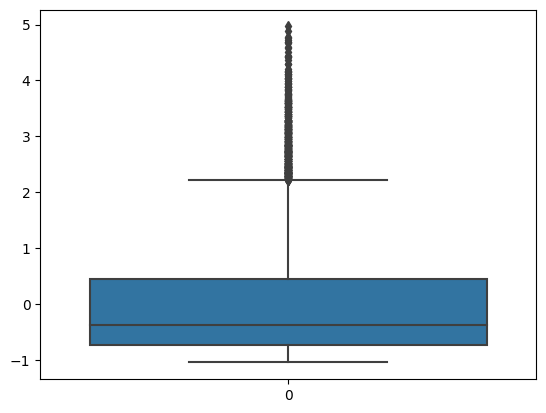

In [7]:
# Box Plot
sns.boxplot( df["Water Content(mol)"].values )

Identify the target column, in this case water content

In [8]:
y = pd.Series( df["Water Content(mol)"] )

Split data into train/test/val

In [36]:
X = df[['RH', 'N_NH4+(mol)', 'N_Na+(mol)', 'N_SO42-(mol)', 'N_NO3-(mol)', 'N_Cl-(mol)']]

#split for train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  shuffle=True)

#split for val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

TWO OPTIONS FOR MODEL:
    1. Load previously trained model
    2. Train new model

Load model

In [126]:
model_wc = load_model('h5/water_content.h5')
model_wc.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                224       
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


Train model

In [37]:
model_wc = Sequential()
#model_water_content.add(Dense(input_dim = 9, units=8, activation=keras.layers.LeakyReLU(alpha=0.3), bias_initializer = initializers.RandomUniform(minval=-0.3, maxval=0.3, seed=None)))
model_wc.add(Dense(input_dim = 6, units=16, activation='tanh'))
model_wc.add(Dense(units=16, activation='tanh'))
model_wc.add(Dense(units=1))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_wc.compile(optimizer = optimizer, loss = 'MeanSquaredError', metrics=['MeanSquaredError'])
history = model_wc.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=5000, shuffle=True)

Epoch 1/5000
210/210 [==============================] - 1s 3ms/step - loss: 0.3602 - mean_squared_error: 0.3602 - val_loss: 0.2335 - val_mean_squared_error: 0.2335
Epoch 2/5000
210/210 [==============================] - 1s 2ms/step - loss: 0.2190 - mean_squared_error: 0.2190 - val_loss: 0.1769 - val_mean_squared_error: 0.1769
Epoch 3/5000
210/210 [==============================] - 1s 3ms/step - loss: 0.1502 - mean_squared_error: 0.1502 - val_loss: 0.1086 - val_mean_squared_error: 0.1086
Epoch 4/5000
210/210 [==============================] - 1s 3ms/step - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.0647 - val_mean_squared_error: 0.0647
Epoch 5/5000
210/210 [==============================] - 1s 2ms/step - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 6/5000
210/210 [==============================] - 1s 3ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 7/5000
210

Save model

In [24]:
model_wc.save('h5/water_content.h5')

Loss graph

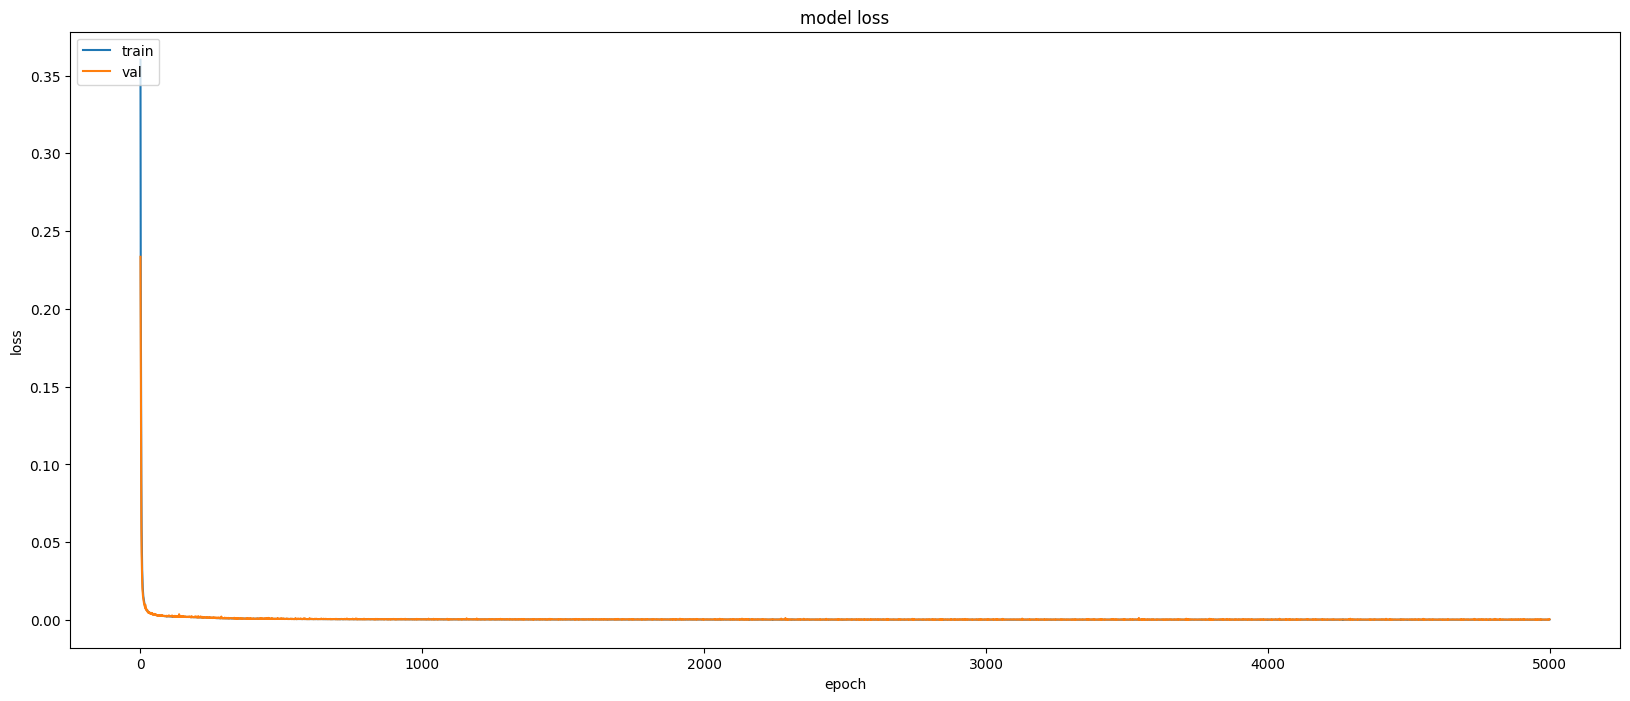

In [38]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
axis = plt.gca()
#axis.set_xlim([1000, 1500])
#axis.set_ylim([0, 0.001])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Generate predictions from model

In [39]:
y_pred = model_wc.predict(X_test)

70/70 [==============================] - 0s 1ms/step


Accuracy graph 

/Users/nic/Library/Python/3.8/lib/python/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


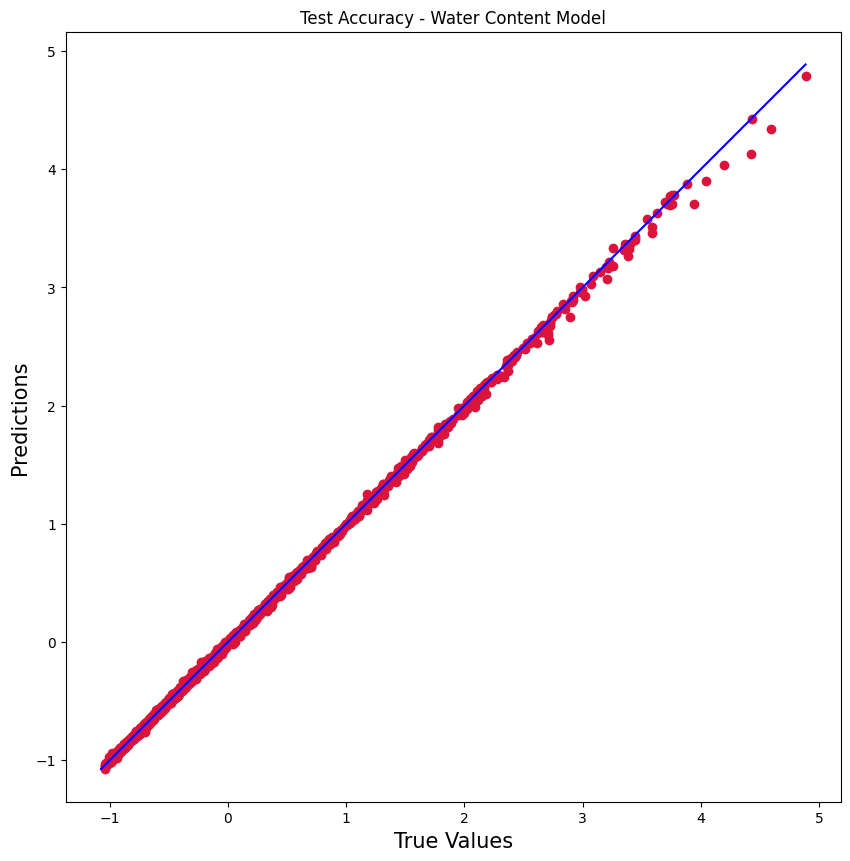

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Test Accuracy - Water Content Model')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Destandardize data

In [41]:
y_test_destan = (y_test * scalers["Water Content(mol)"][1]) + scalers["Water Content(mol)"][0]
y_pred_destan = (y_pred * scalers["Water Content(mol)"][1]) + scalers["Water Content(mol)"][0]

#change negative values from destandardization to 0
y_test_destan[y_test_destan < 0] = 0
y_pred_destan[y_pred_destan < 0] = 0

#destandardize features
for col in X_test.columns:
    X_test[col] = X_test[col] * scalers[col][1] + scalers[col][0]

X_test.describe()

,RH,N_NH4+(mol),N_Na+(mol),N_SO42-(mol),N_NO3-(mol),N_Cl-(mol)
count,2232.000000,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03
mean,0.556586,4.547864e-08,1.925560e-08,7.035440e-09,1.668740e-08,3.399147e-08
std,0.068499,1.458627e-08,7.414944e-09,4.286527e-09,8.581789e-09,1.088703e-08
min,0.450000,2.324523e-08,7.748410e-09,0.000000e+00,3.874205e-09,1.743392e-08
25%,0.500000,3.348078e-08,1.355972e-08,3.750000e-09,9.841500e-09,2.475186e-08
50%,0.550000,4.264650e-08,1.800000e-08,6.457008e-09,1.506635e-08,3.247695e-08
75%,0.600000,5.670000e-08,2.361960e-08,9.624987e-09,2.187000e-08,4.252500e-08
max,0.700000,8.000000e-08,4.000000e-08,2.250000e-08,4.000000e-08,6.000000e-08


Calculate numerical model accuracy metrics (Normalized Mean Absolute Error (NMAE) & Normalized Mean Bias Error (NMBE))

In [42]:
nmae = 0
nmbe = 0
num_elements = 0

largest_thirty_errors = [(0, 0) for element in range(30)] 
largest_thirty_error_inputs = pd.DataFrame(columns=['RH', 'N_NH4+(mol)', 'N_Na+(mol)', 'N_SO42-(mol)', 'N_NO3-(mol)', 'N_Cl-(mol)', 'NMAE'])
#nn_vals_largest_error = [0 for element in range(30)] 

i = 0

for ea, nn in zip(y_test_destan, y_pred_destan):
    num_elements += 1

    nn = nn[0]
        
    if ea == 0 and nn == 0:
        continue

    if 2 * abs(ea - nn) / (ea + nn) > largest_thirty_errors[0][0]:
        '''
        index = 0
        for err in largest_thirty_errors:
            if abs(ea-nn) > err:
                if index != 29:
                    index += 1
            else:
                index -= 1
                break

        nn_vals_largest_error.pop(0)
        nn_vals_largest_error.insert(index, nn)
        '''

        largest_thirty_errors.pop(0)

        bisect.insort(largest_thirty_errors, (2 * abs(ea - nn) / (ea + nn), i))
    
    nmae += 2 * abs(ea-nn) / (ea + nn)
    nmbe += 2 * (nn - ea) / (nn + ea) 
    i += 1


for error in largest_thirty_errors:
    index = error[1]
    new_row = X_test.iloc[index].to_frame().T
    new_row['NMAE'] = error[0]
    largest_thirty_error_inputs = pd.concat([largest_thirty_error_inputs, new_row])

nmae /= num_elements
nmbe /= num_elements

print(largest_thirty_errors)
print("Normalized Mean Absolute Error:")
print(nmae)
print("Normalized Mean Bias Error:")
print(nmbe)

largest_thirty_error_inputs.to_csv('error_input_vals.csv')

[(0.21713745156960326, 1590), (0.21910467290495317, 8), (0.23094559295118655, 891), (0.23284541271006134, 112), (0.24093467500683013, 1019), (0.24647968211327143, 1573), (0.2572673400561949, 1196), (0.2907149028269897, 1751), (0.2938566344364381, 202), (0.3441738741700493, 2029), (0.35647510324368487, 1707), (0.36670651200774135, 237), (0.3943840183889244, 555), (0.3960556485556245, 842), (0.39708332664652973, 14), (0.40048916388805145, 1282), (0.43857089867610416, 2066), (0.4460822164556824, 1327), (0.4660963950215181, 1851), (0.5051748511940103, 1774), (0.5067872613358113, 408), (0.5086518336707778, 1826), (0.5095901881935342, 661), (0.5385803146759046, 1173), (0.6972877743073339, 157), (0.7947338567357788, 141), (1.1358088303229772, 437), (2.0, 305), (2.0, 934), (2.0, 1410)]
Normalized Mean Absolute Error:
0.028267898092187098
Normalized Mean Bias Error:
-0.01268329546395612
